# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Khairunnisa Syahirah Naifah
- **Email:** khairunnisasyahirah08@gmail.com
- **ID Dicoding:** icaksn

## Menentukan Pertanyaan Bisnis

- Pada Jam Berapa Penyewa Sepeda Menyewakan Sepeda Terbanyak?
- Pada musim apa Penyewa Sepeda Mendapatkan banyak Penggemar?
- Pada tahun 2011-2012, apakah total penyewa sepeda naik atau turun pada tiap bulannya?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
#Membaca dan Memuat Data Day
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#Membaca dan Memuat Data Hour
hour = pd.read_csv("hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
#Memeriksa Data Type dari Dataset Day
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
#Memeriksa Missing Value Dataset
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#Memeriksa Duplikat Baris
day.duplicated().sum()

0

In [8]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#Memeriksa Data Type dari Dataset Hour
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
#Memeriksa Missing Value Dataset
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
#Memeriksa Duplikat Baris
hour.duplicated().sum()

0

In [12]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Menghapus Columns Dataset

In [13]:
#Menghapus Columns Dataset yang Tidak Diperlukan
day.drop(columns=["instant"])

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [14]:
#Menghapus Columns Dataset yang Tidak Diperlukan
hour.drop(columns="instant")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Mengubah Nama Columns

In [15]:
#Mengubah Nama Columns Agar Lebih Mudah Dibaca
day.rename(columns={"dteday":'date_day',
                        "mnth":'month',
                        'hr':'hour',
                        'weekday':'day',
                        'yr':'year',
                        'weathersit': 'weather',
                        'cnt': 'count'},
               inplace=True)
hour.rename(columns={"dteday":'date_day',
                       "mnth":'month',
                       'hr':'hour',
                       'weekday':'day' ,
                       'yr':'year',
                       'weathersit': 'weather',
                       'cnt': 'count'},
              inplace=True)
hour

,instant,date_day,season,year,month,hour,holiday,day,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Mengubah Type Data Dataset

In [16]:
#Mengubah Type Data Int Menjadi Category "season", "mnth", "holiday","weekdays", and "weathersit"
columns=["season", "month", "holiday", "day", "weather"]

for  col in columns:
    day[col] = day[col].astype("category")
    hour[col] = hour[col].astype("category")

In [17]:
#Mengonversi Type Data dydate
day["date_day"] = pd.to_datetime(day["date_day"])
hour["date_day"] = pd.to_datetime(hour["date_day"])

Mengganti Konten Columns

In [18]:
#Mengganti Konten dari tiap Columns
#Season; 1:springer, 2:summer, 3:fall, 4:winter
hour.season.replace((1,2,3,4), ('springer', 'summer', 'fall', 'winter'), inplace=True)
day.season.replace((1,2,3,4), ('springer', 'summer', 'fall', 'winter'), inplace = True)

#year; 0:2011, 1:2012
hour.year.replace((0,1),(2011,2012),inplace=True)
day.year.replace((0,1),(2011,2012),inplace=True)

#month; 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
hour.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),("Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul","Aug", "Sep", "Oct", "Nov", "Dec"),inplace=True)
day.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),("Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul","Aug", "Sep", "Oct", "Nov", "Dec"),inplace=True)

#day; 0:Sun, 1:Mon, 2:Tue, 3:Wed,  4:Thu, 5:Fri, 6:Sat
hour.day.replace((0,1,2,3,4,5,6),("Sun","Mon","Tue","Wed","Thu","Fri","Sat"),inplace=True)
day.day.replace((0,1,2,3,4,5,6),("Sun","Mon","Tue","Wed","Thu","Fri","Sat"),inplace=True)

#weather_situation; 1:Clear, 2:Mist, 3:Light_rainsnow, 4:Heavy_rainsnow
hour.weather.replace((1,2,3,4),("Clear", "Mist", "Light_rainsnow", "Heavy_rainsnow"), inplace=True)
day.weather.replace((1,2,3,4),("Clear", "Mist", "Light_rainsnow", "Heavy_rainsnow"), inplace=True)

hour.head()

,instant,date_day,season,year,month,hour,holiday,day,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,springer,2011,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore Dataset Hour

In [19]:
hour.describe(include="all")

<ipython-input-19-a618798295db>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour.describe(include="all")


,instant,date_day,season,year,month,hour,holiday,day,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.0,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,2.0,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,fall,NaN,May,NaN,0.0,Sat,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,16879.0,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,NaN,NaN,0.465431,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [20]:
#grouping bike sharing based on hours
users_by_hour = hour.groupby("hour").agg({"count":["sum"]})
users_by_hour

,count
,sum
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


### Explore Dataset Day

In [21]:
day.describe(include="all")

<ipython-input-21-0f75e45f5a45>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day.describe(include="all")


,instant,date_day,season,year,month,holiday,day,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731,731.000000,731,731.0,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,2.0,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,fall,NaN,Jan,0.0,Sun,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,710.0,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,NaN,NaN,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [22]:
day[day['year'] == 2011].groupby(by="month")['count'].sum().sort_values(ascending=False)

month
Jun    143512
Jul    141341
Aug    136691
May    135821
Sep    127418
Oct    123511
Nov    102167
Apr     94870
Dec     87323
Mar     64045
Feb     48215
Jan     38189
Name: count, dtype: int64

In [23]:
day[day['year'] == 2012].groupby(by="month")['count'].sum().sort_values(ascending=False)

month
Sep    218573
Aug    214503
Jul    203607
Jun    202830
Oct    198841
May    195865
Apr    174224
Mar    164875
Nov    152664
Dec    123713
Feb    103137
Jan     96744
Name: count, dtype: int64

In [24]:
day[day['year'] == 2012].groupby(by="season")['count'].sum().sort_values(ascending=False)

season
fall        641479
summer      571273
winter      515476
springer    321348
Name: count, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada Jam Berapa Penyewa Sepeda Menyewakan Sepeda Terbanyak?



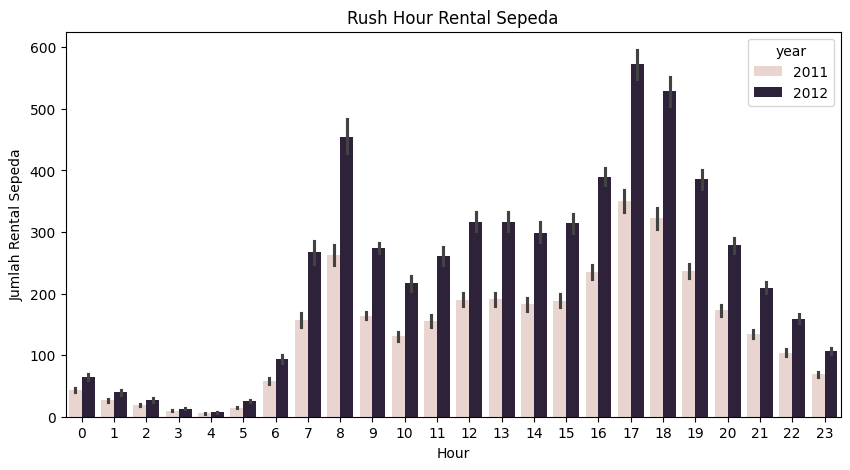

In [25]:
plt.figure(figsize=(10,5))

sns.barplot(x='hour', y='count', data=hour, hue='year')

plt.xlabel("Hour")
plt.ylabel("Jumlah Rental Sepeda")
plt.title("Rush Hour Rental Sepeda")

plt.show()

### Pertanyaan 2: Pada tahun 2012, Penyewa Sepeda Mendapatkan banyak Penggemar di musim apa?


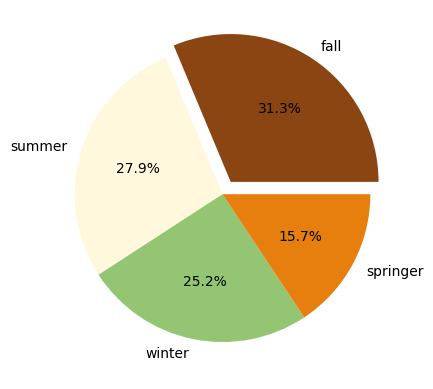

In [26]:
season = ('fall', 'summer', 'winter', 'springer')
values = [641479, 571273, 515476, 321348]
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D')
explode = (0.1, 0, 0, 0)

plt.pie(
    x=values,
    labels=season,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()

## Pertanyaan 3: Pada tahun 2011-2012, apakah total penyewa sepeda naik atau turun pd tiap bulannya?


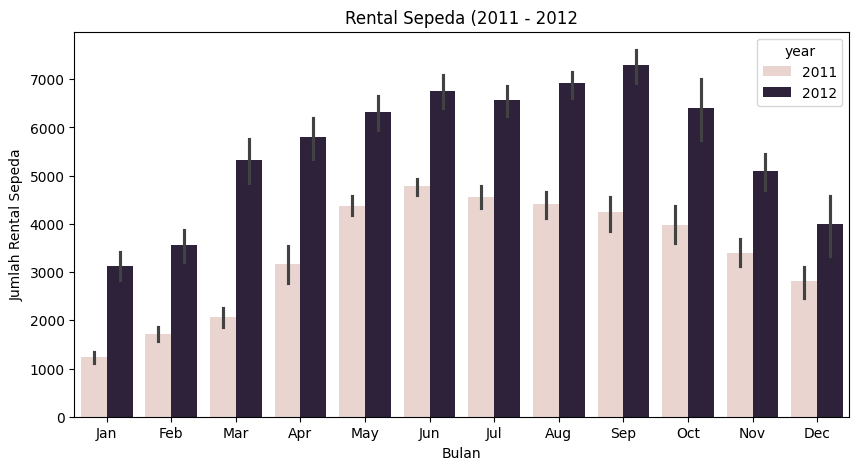

In [27]:
plt.figure(figsize=(10,5))

sns.barplot(x='month', y='count', data=day, hue='year')

plt.xlabel("Bulan")
plt.ylabel("Jumlah Rental Sepeda")
plt.title("Rental Sepeda (2011 - 2012")

plt.show()

## Conclusion

- Penyewa sepeda terbanyak terjadi pada jam 17.00 - 18.00. Sehingga, dapat ditarik kesimpulan bahwa para pekerja menggunakan Rental Sepeda sebagai alat akomodasi untuk pulang ke rumah.
- Pada tahun 2012, penyewa sepeda banyak digemari oleh masyarakat pada musim gugur(fall).
- Pada tahun 2012, masyarakat sudah mulai mengenali dan menggemari Rental Sepeda. Namun, Rental Sepeda mengalami penurunan pada November-December.

In [30]:
day.to_csv("day_data.csv", index=False)
hour.to_csv("hour_data.csv", index=False)